# **Project Ecommerce**

### Pre Process (importing the data, tasks before EDA.)

In [1]:
# Importing  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv")

In [3]:
df.shape

(500, 8)

In [8]:
df.head(5)

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# Drop unique features which will not contribute in result.
del df['Email']
del df['Address']
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Analizing Feature Avatar

In [10]:
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

<AxesSubplot: xlabel='Count', ylabel='Avatar'>

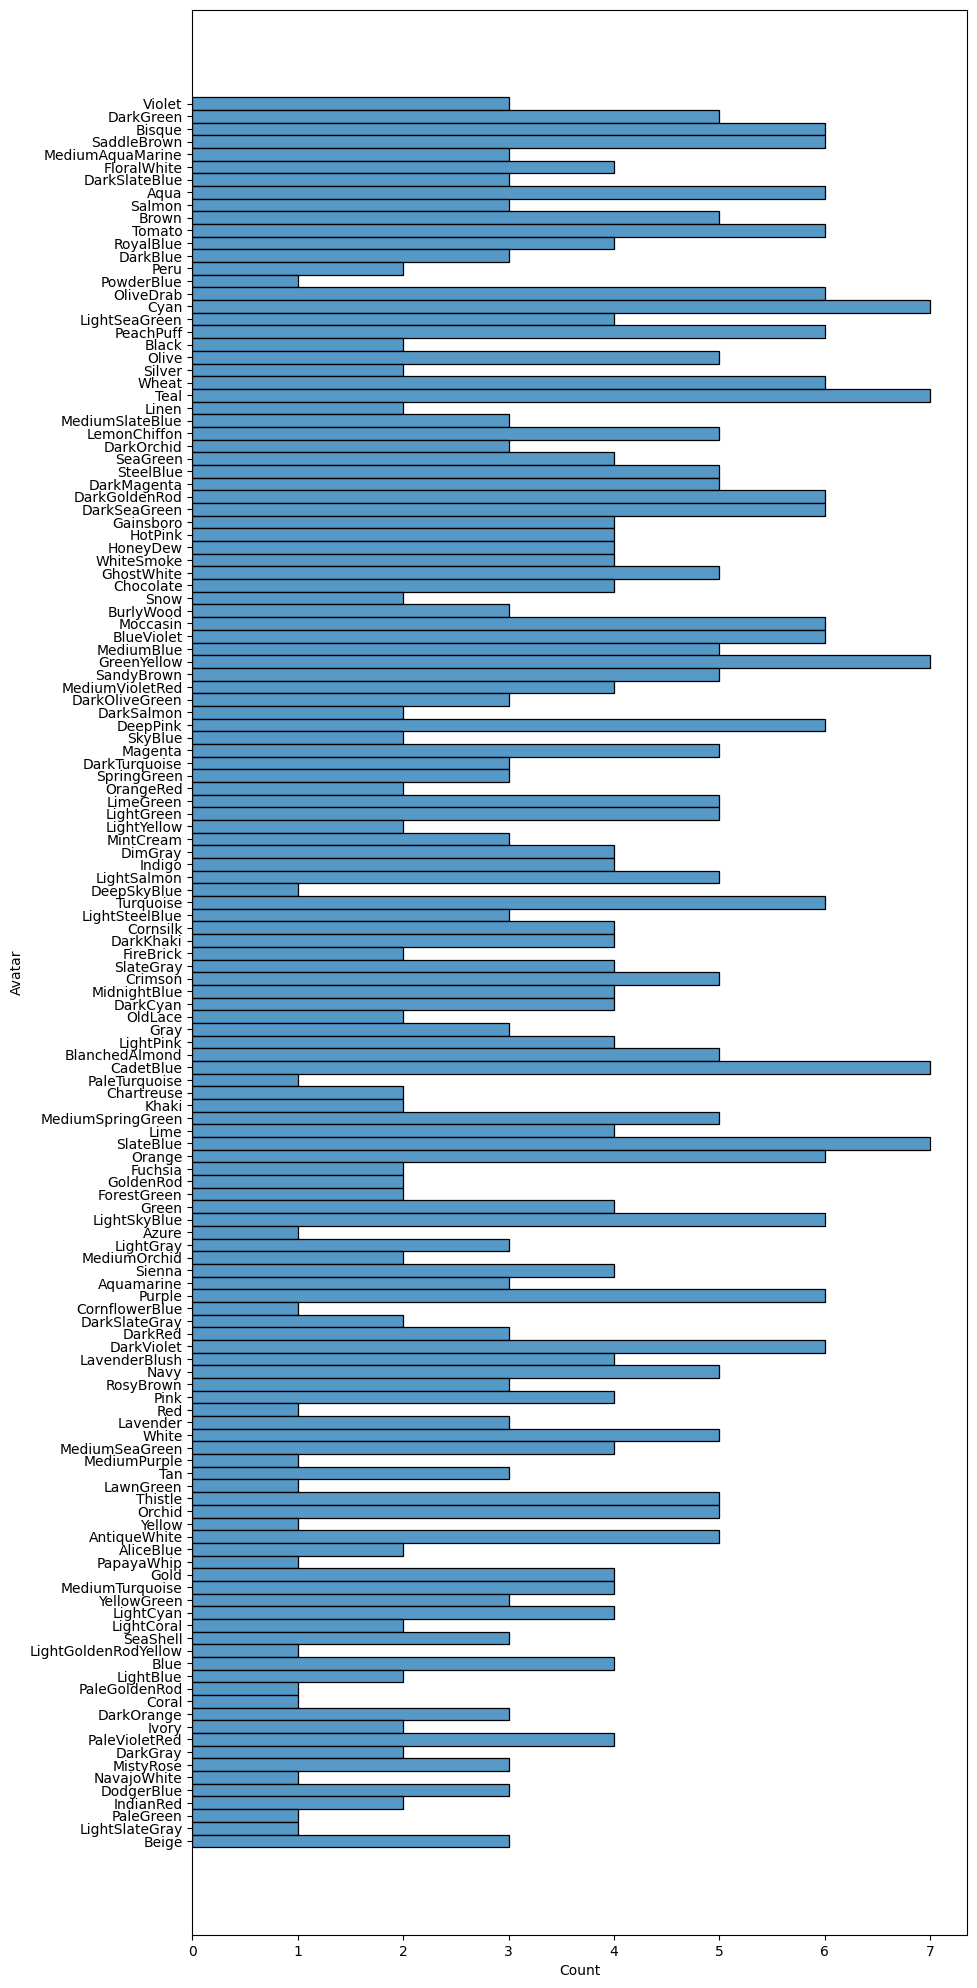

In [14]:
plt.figure(figsize = (10,25)) 
sns.histplot(y = df['Avatar'], element="bars")

In [15]:
names = df['Avatar'].value_counts().index.tolist()
counts = df['Avatar'].value_counts().tolist()
value = dict(zip(names, counts))
len(value)

138

In [16]:
df['colour_count']= df['Avatar'].replace(value)

<AxesSubplot: xlabel='colour_count', ylabel='Yearly Amount Spent'>

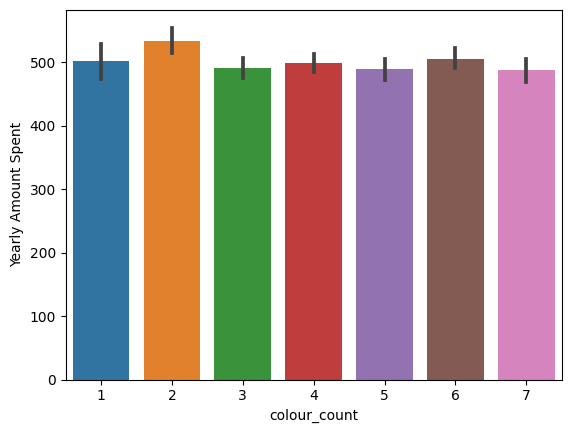

In [17]:
sns.barplot(x=df['colour_count'],y=df['Yearly Amount Spent']) 

 We are droping this feature as no linear relationship exits with yearly amount spent.


In [18]:
del df['colour_count']

In [19]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Analizing Relation with Avg Session length

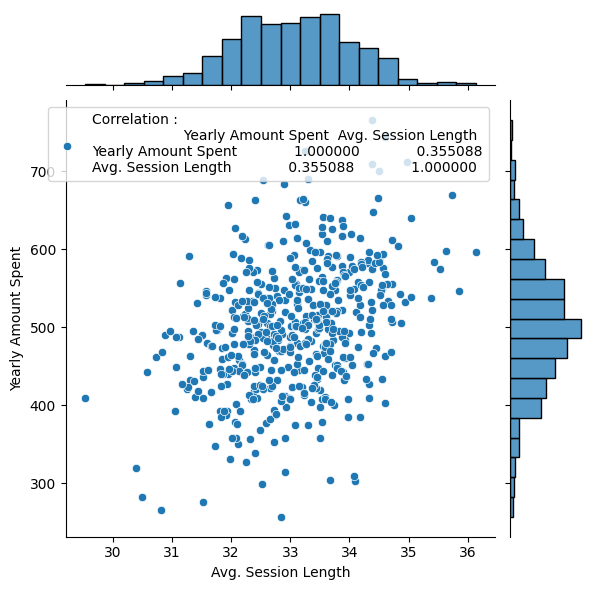

In [20]:
lab = df[['Yearly Amount Spent','Avg. Session Length']].corr()
sns.jointplot(x='Avg. Session Length',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

Here we see a normal distribution but there is a lot of spread


Analizing Relation with Time on App 

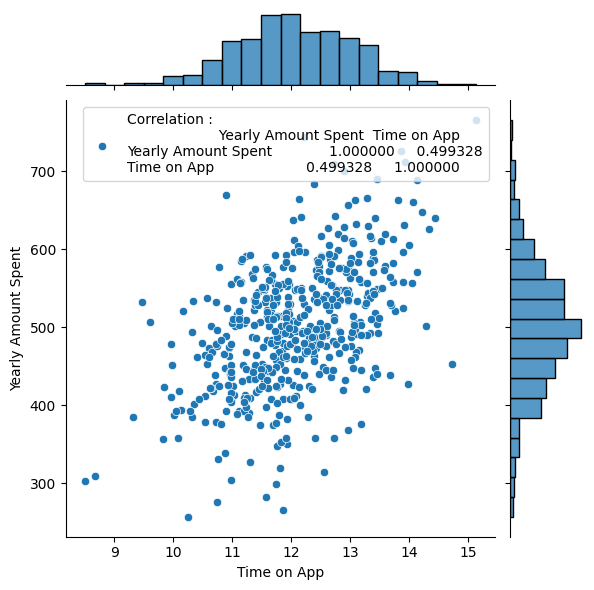

In [21]:
lab = df[['Yearly Amount Spent','Time on App']].corr()
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

Again The dist is normal but we see a better line than the previous plot.


In [22]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Analizing Relation with Time on Website

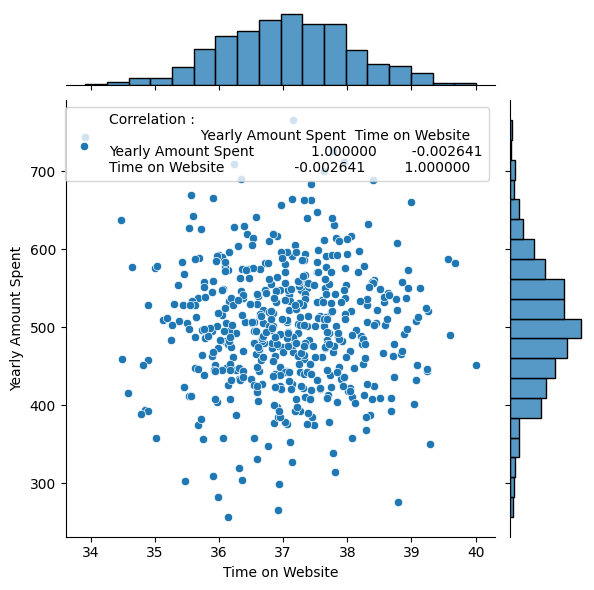

In [23]:
lab = df[['Yearly Amount Spent','Time on Website']].corr()
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

A lot of spread no relation can be concluded

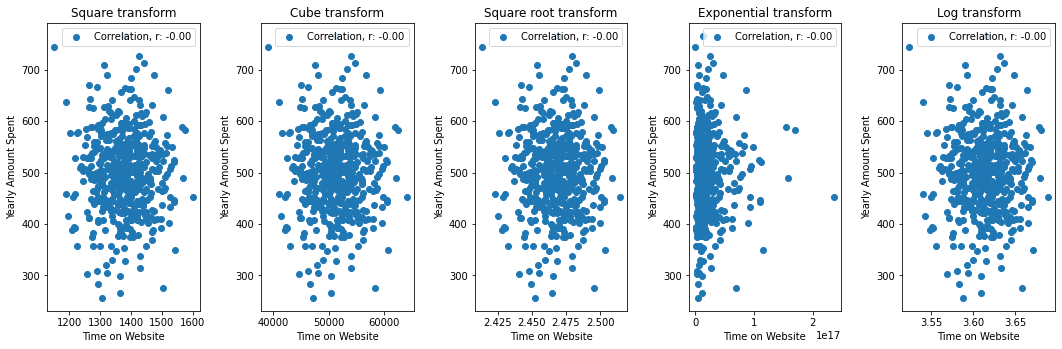

we are droping this feature.

In [24]:
del df['Time on Website']


In [25]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Length of Membership',
       'Yearly Amount Spent'],
      dtype='object')

Analizing Relation with Length of Membership

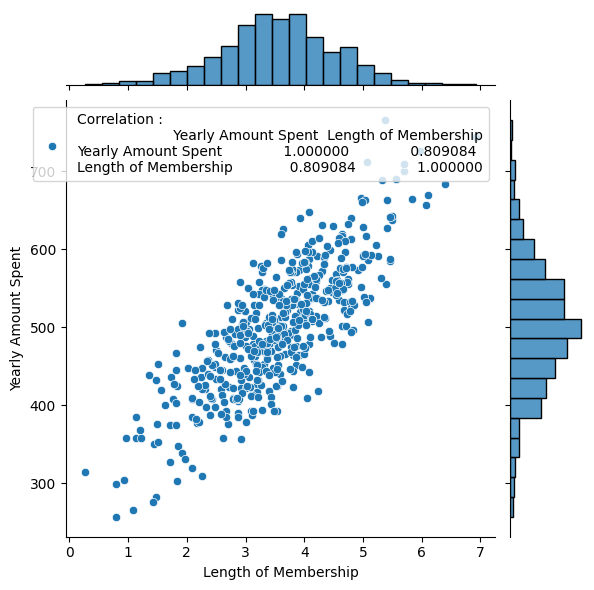

In [26]:
lab = df[['Yearly Amount Spent','Length of Membership']].corr()
sns.jointplot(x='Length of Membership',y ='Yearly Amount Spent', data = df,label = f'Correlation : \n{lab}')

## Multicolinearity

Definately here we see a good line.

C:\Users\DELL\AppData\Local\Temp\ipykernel_1352\4030577372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


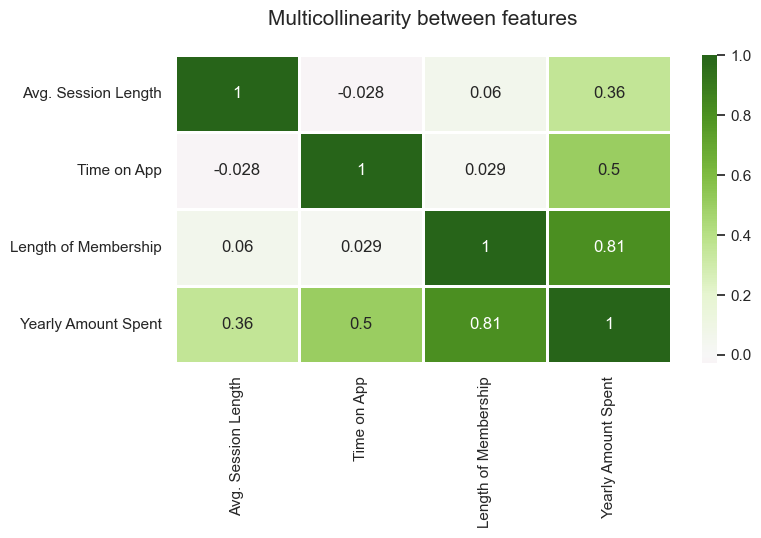

In [27]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.9,
            center=0,
            cbar=True,
            cmap="PiYG")
plt.title('Multicollinearity between features\n', fontsize = 15)
plt.show()

We definately see a good correlation of all features with target.

## Avatar Onehot Encoading

In [25]:
df = pd.get_dummies(df,columns=['Avatar'])
df

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,4.082621,587.951054,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31.926272,11.109461,2.664034,392.204933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,4.104543,487.547505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,3.120179,581.852344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,4.446308,599.406092,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,3.576526,529.049004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,4.958264,551.620145,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,2.336485,456.469510,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


* All the values are now numbers in our data.
* Now to the modeling process.

## Avatar Onehot Encoading

In [33]:
df = pd.get_dummies(df,columns=['Avatar'])
df

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,4.082621,587.951054,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31.926272,11.109461,2.664034,392.204933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,4.104543,487.547505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,3.120179,581.852344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,4.446308,599.406092,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,3.746573,573.847438,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,3.576526,529.049004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,4.958264,551.620145,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,2.336485,456.469510,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Model Building.

## Split and Scale.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
x = df.drop(columns=['Yearly Amount Spent'])
y = df['Yearly Amount Spent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)
x_train.head()

,Avg. Session Length,Time on App,Length of Membership,Avatar_AliceBlue,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,Avatar_Bisque,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
312,30.393185,11.802986,2.083814,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,33.217188,10.999684,4.243813,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,32.655397,11.918860,2.159676,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,31.169507,13.970181,1.785174,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
74,33.879745,13.587806,3.258113,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [38]:
for i in range(2,15):
  reg_model=LinearRegression()
  reg_model.fit(x_train,y_train)
  s = np.mean(cross_val_score(reg_model, x_train, y_train, cv = i)) # mean cv_score
  t = reg_model.score(x_train,y_train)
  print(i,t,s)

2 0.9892788847382393 -7.552559289775333e+27
3 0.9892788847382393 -2.1572607145417965e+27
4 0.9892788847382393 -7.591108687519577e+26
5 0.9892788847382393 -6.982370268416557e+26
6 0.9892788847382393 -3.0079477472468536e+26
7 0.9892788847382393 -4.856354687303953e+26
8 0.9892788847382393 -4.227464277077866e+26
9 0.9892788847382393 -1.0239457044015728e+27
10 0.9892788847382393 -3.3208928484391666e+26
11 0.9892788847382393 -4.296338720406853e+26
12 0.9892788847382393 -4.543283136306952e+26
13 0.9892788847382393 -2.459232810462106e+26
14 0.9892788847382393 -6.151785366029792e+26


In [39]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)
s = np.mean(cross_val_score(reg_model, x_train, y_train, cv = 12))
print(s)

-4.543283136306952e+26


lowest train error so we are fitting with the same.

In [40]:
reg_pred=reg_model.predict(x_test)

In [41]:
score=r2_score(reg_pred,y_test)
score

-0.017430414586912413

Its an over fit to our data this was a pure doubt when the cv score was negative and the train was 99% we need to build a model that can go with feature tollerance.


To overcome We will use the lasso regression which take absolute errors to build the lambda.

## lasso Regression.

In [42]:
lasso=Lasso()

In [43]:
parameters={'alpha':np.arange(0.01, 2, 0.01)}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=12)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])},
             scoring='neg_mean_squared_error')

In [44]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 0.81}
-105.32230406042562


In [45]:
lasso_pred=lassocv.predict(x_test)

In [46]:
score=r2_score(lasso_pred,y_test)
score

0.9831125057377403

Thats the best model yet so when the slopes are taken as absolute and multiplied with a introduced bias(lambda) the redundent features are ignored.


## Ridge Regression

In [47]:
ridge_regressor=Ridge()

In [48]:
parameters={'alpha':np.arange(0.01, 3, 0.01)}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=12)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=12, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             scoring='neg_mean_squared_error')

In [49]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 2.8299999999999996}
-153.53037553254856


In [50]:
ridge_pred=ridgecv.predict(x_test)
score=r2_score(ridge_pred,y_test)
score

0.9782607732043849

Not the best model

# Conclution : -

Overall, the analysis of the dataset revealed that certain features, such as "Length of Membership," had a strong positive correlation with the target variable. On the other hand, other features, such as "Time on Website," were found to have no correlation and were removed from the analysis. The feature avatar had 138 unique values which is very large for a 500 sample data, but the grouped count values still contributed uniformly with sales. which explained the importance of the feature. When applying different regression models to the data, the Lasso model was found to have the best performance, with a score of 0.9831. These results suggest that the Lasso model may be a good choice for predicting the target variable in this dataset. on the analysis a good membership (had a corr of 0.8) is the factor increasing amount spent. thus the business should focus on increasing memberships.